In [1]:
import cv2
from PIL import Image
from imageai.Detection import ObjectDetection
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [47]:
def captureFromCam():
    # camera capture object from cv2.VideoCapture class that takes ndex to camera port as arguement
    videoCam = cv2.VideoCapture(0)
    # when to save the image and stop video
    capture = False
    print('Press c to capture the image or e to exit...')
    # loop
    while(True):
        # capture the video frame by frame
        retangle, image = videoCam.read()
        #image = cv2.flip(image, 1)
        # color negative
        #image = ~image
        # display the video
        cv2.imshow('Video', image)
        # capture image
        if cv2.waitKey(1) & 0xFF == ord('c'):
            print('Image saved!')
            # location
            file = "Undetected.png"
            # save the last captured frame/image
            cv2.imwrite(file, image)
            # stop capturing
            break
        # exit condition
        #if cv2.waitKey(1) & 0xFF == ord('e'):
        #    break
    # release the videoCam object when done
    videoCam.release()
    # delete the object
    del(videoCam)
    # destroy all windows
    cv2.destroyAllWindows()
    
def showImg():
    # open image in Windows image viewer
    #os.startfile('test_image.png')
    # another way to do the same
    #im = Image.open(r"test_image.png")  
    #im.show()
    BGR_img = cv2.imread('Undetected.png')
    # Matplot lib expects img in RGB format but OpenCV provides it in BGR
    RGB_img = cv2.cvtColor(BGR_img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img)
    plt.title('The photo you took')
    plt.show()
    
def detectObjects():
    detector = ObjectDetection()

    model_path = "yolo-tiny.h5"
    input_path = "Undetected.png"
    output_path = "Detected.png"

    detector.setModelTypeAsTinyYOLOv3()
    detector.setModelPath(model_path)
    detector.loadModel()
    detection = detector.detectObjectsFromImage(input_image=input_path, output_image_path=output_path)

    for eachItem in detection:
        print(eachItem["name"] , " : ", eachItem["percentage_probability"])

def resizeYourImage():
    im = Image.open("Undetected.png")
    resizedImage = im.resize((28, 28))
    resizedImage.save("Undetected.png")
    print('Resized!')

def imgPreProcess():
    img = cv2.imread("Undetected.png")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    out = cv2.addWeighted( gray, 2, gray, 0, 0)
    cv2.imwrite("Undetected.png", out)
    
def predictWho():
    img = cv2.imread("Undetected.png",cv2.COLOR_BGR2RGB)
    test = np.array(img)
    X = np.array(test).reshape(-1,28,28,1)
    X = X/ 255.0
    new_model = tf.keras.models.load_model('digit_classify.model')
    predictions = new_model.predict(X)
    print(np.argmax(predictions))

Press c to capture the image or e to exit...
Image saved!


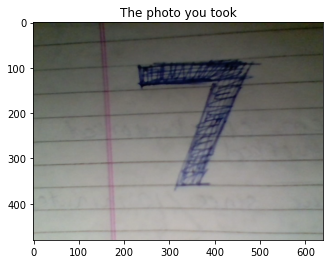

Resized!


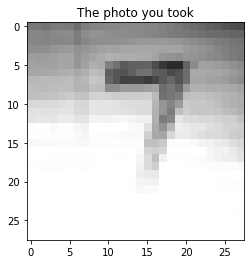

2


In [49]:
captureFromCam()
showImg()
#detectObjects()
imgPreProcess()
#showImg()
resizeYourImage()
showImg()
predictWho()